In [1]:
from pyscf import gto,scf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyscf.dft.numint import eval_rho,eval_ao
mol = gto.M(atom='O 0 0 0; C 1.2 0 0', basis='ccpvdz')
ls = np.linspace(-2,4,1005)  # 100 random points
coords=np.zeros((3,1005))
coords[0]=ls
coords=coords.T
ao_value = eval_ao(mol, coords, deriv=1)
mf=scf.RKS(mol)
mf.scf()
dm = mf.make_rdm1()
dm = (dm + dm.T)/2
rho= eval_rho(mol, ao_value, dm, xctype='GGA')

converged SCF energy = -112.4161833258


In [3]:
rho.shape

(4, 1005)

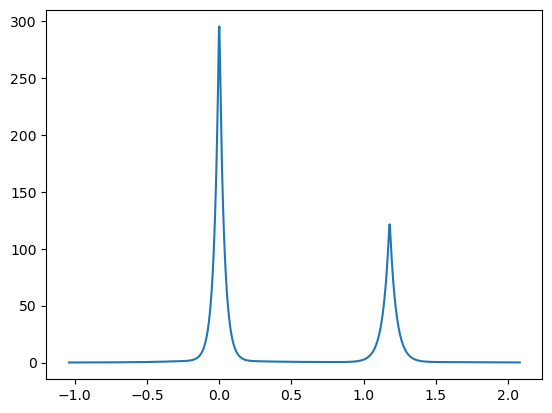

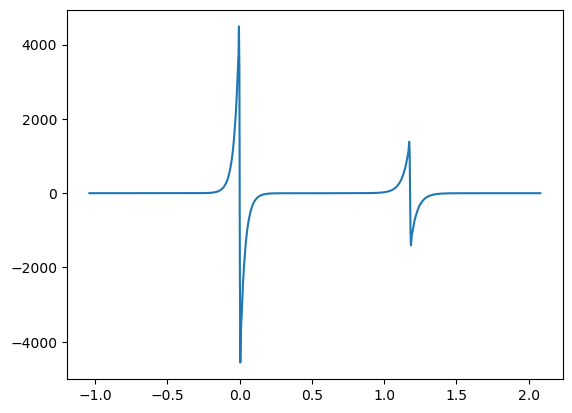

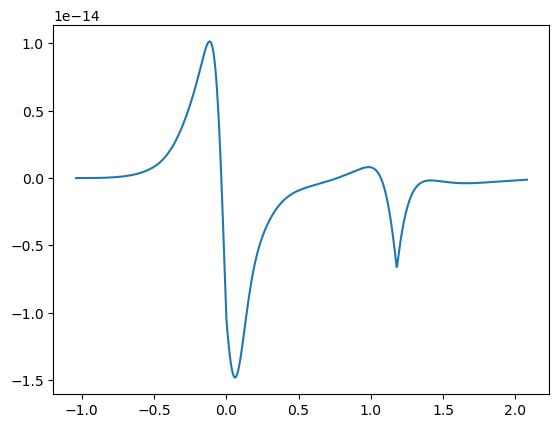

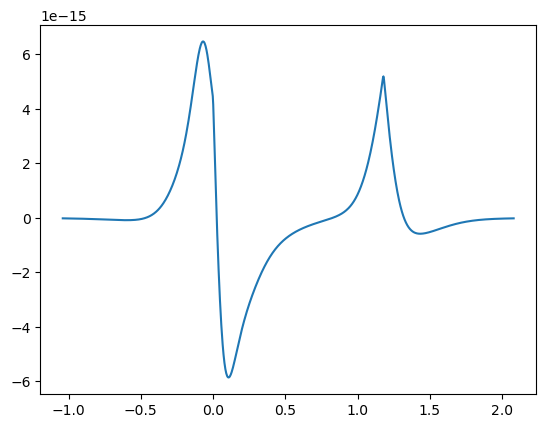

In [4]:
#plt.yscale("log")
plt.plot(ls*.52,rho[0])
plt.show()
plt.plot(ls*.52,rho[1])
plt.show()
plt.plot(ls*.52,rho[2])
plt.show()
plt.plot(ls*.52,rho[3])